# Project Overview

In this project, we aim to analyze financial market trends with a focus on sentiment analysis, regional factors, and temporal elements. We will be leveraging Python's capabilities within a Jupyter Notebook environment, making use of its extensive ecosystem of data analysis and visualization libraries.

## Objective

The primary objective is to generate meaningful insights on stock market behavior by considering various factors such as average growth, user-specified time periods, sentiment analysis, and regional impacts. This will provide a comprehensive understanding of market dynamics, assisting investors in making informed decisions.

## Key Features

- **Average Growth Analysis**: We will calculate the average growth of selected stocks over a one-year period to identify overall trends and the stock's performance.

- **Groth vector**: We plot groth vector for each year.

- **User Input Time Period**: Users will have the flexibility to specify their time period of interest for analysis. This allows for customizable insights tailored to individual investment strategies and time horizons.

- **Sentiment Analysis**: Using Natural Language Processing (NLP) techniques, we will perform sentiment analysis on various news articles and social media posts. This analysis will help understand public sentiment towards specific stocks, sectors, or the market as a whole.

- **Sentiment in JSON Format**: Sentiment data will be organized in a structured JSON format, which will include measures such as sentiment score, conflict level, and growth trend. This structured format will make the data easily accessible for further analysis and visualization.

- **Regional Analysis**: We will consider the impact of regional factors on the market. This includes analyzing the sentiment and market performance in different countries or regions. 

- **Pandemic Impact**: An essential aspect of this project is to understand the influence of global events, like the COVID-19 pandemic, on market behavior. We'll analyze the correlation between such events and market fluctuations.

## Methodology

1. **Data Acquisition**: We'll use Python libraries like `yfinance 0.2.18` https://pypi.org/project/yfinance/ for fetching historical market data, and `requests` or `beautifulsoup` for web scraping news articles and social media posts.

2. **Data Processing**: We'll use `pandas` for data manipulation and processing. For NLP tasks, libraries like `nltk` or `spacy` will be used.

3. **Sentiment Analysis**: Sentiment analysis will be performed using machine learning or deep learning techniques, utilizing libraries such as `OpenAI API`, `nltk`, `sklearn`, `tensorflow`, or `pytorch`.

4. **Data Visualization**: We'll utilize `matplotlib` and `seaborn` for data visualization, creating intuitive graphs and plots to represent our findings.

## Future Scope

This project could be extended in several ways:

- Expanding the range of factors considered in the analysis, such as incorporating additional economic indicators or company-specific data.
- Building predictive models to forecast future market trends based on the analyzed factors.
- Creating an interactive dashboard for real-time market sentiment tracking.

By combining financial data with sentiment analysis and regional factors, this project aims to provide a holistic view of market dynamics.


In [75]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

VTI = yf.Ticker("VTI")
VOO = yf.Ticker("VOO")
msft = yf.Ticker("MSFT")

# get all stock info
#print(msft.analyst_price_target)


#from sklearn.preprocessing import MinMaxScaler
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, LSTM


In [76]:
start = dt.datetime(1998,1,1)
end = dt.datetime(2021,2,1)
VTI_hist = VTI.history(start=start, end=None)
VOO_hist = VOO.history(start=start, end=None)
#VV_hist = VV.history(start=start, end=None)
#VWO_hist = VWO.history(start=start, end=None)
MSTF_hist = msft.history(start=start, end=None)

In [93]:
VTI_hist.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2001-06-15 00:00:00-04:00,37.232787,37.622414,37.064845,37.394012,1067400,0.0,0.0,0.0
2001-06-18 00:00:00-04:00,37.494793,37.561972,37.155552,37.155552,282600,0.0,0.0,0.0
2001-06-19 00:00:00-04:00,37.719825,37.729901,37.105156,37.259663,1777600,0.0,0.0,0.0
2001-06-20 00:00:00-04:00,37.199202,37.669440,37.199202,37.652645,476000,0.0,0.0,0.0
2001-06-21 00:00:00-04:00,37.619053,38.106084,37.535081,37.954937,240400,0.0,0.0,0.0


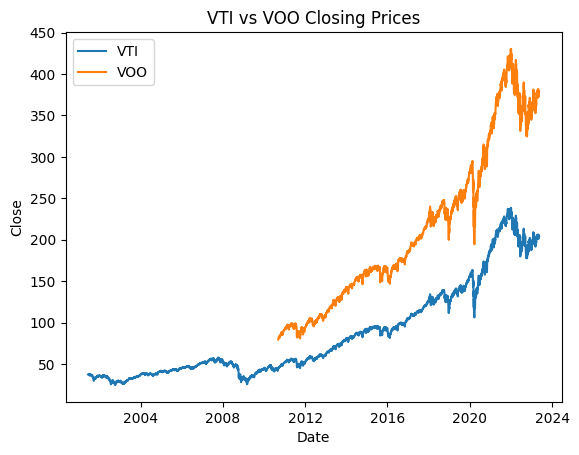

In [78]:
sns.lineplot(data=VTI_hist, x='Date', y='Close', label='VTI')
sns.lineplot(data=VOO_hist, x='Date', y='Close', label='VOO')

plt.title('VTI vs VOO Closing Prices')
plt.legend(loc='upper left')
plt.show()

<Axes: xlabel='Date', ylabel='Close'>

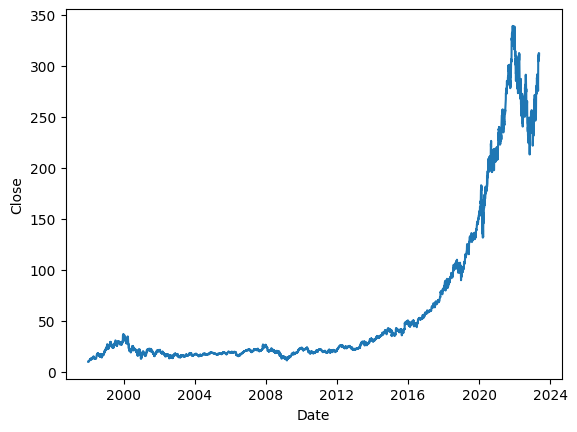

In [79]:
sns.lineplot(data=MSTF_hist,x='Date', y='Close')

In [92]:
df_new = pd.pivot_table(VTI_hist, 
                        index=VTI_hist.index.year, 
                        values=['Open', 'Close', 'Dividends'], 
                        aggfunc={'Open': 'first', 'Close': ['first', 'last', np.mean], 'Dividends': np.sum})
# Flatten the multi-index column names
df_new.columns = ['_'.join(col).strip() for col in df_new.columns.values]

# Calculate the yearly growth based on the first 'Close' and last 'Close' price of the year
df_new['average_growth'] = (df_new['Close_last'] - df_new['Close_first']) / df_new['Close_first']*100

# Rename 'Dividends' to 'yearly_dividends' for clarity
# Also rename 'Open' to 'open_price' and 'Close' to 'close_price'
df_new.rename(columns={'Open_first': 'open_price', 'Close_last': 'close_price', 'Dividends_sum': 'yearly_dividends', 'Close_mean': 'avg_close_price'}, inplace=True)

df_new = df_new[['open_price', 'close_price', 'avg_close_price', 'yearly_dividends', 'average_growth']]

df_new['pct_div']=df_new['yearly_dividends']/df_new['avg_close_price']*100
df_new.head(5)


,open_price,close_price,avg_close_price,yearly_dividends,average_growth,pct_div
Date,,,,,,
2001,37.232787,35.747135,35.221868,0.4940,-4.404120,1.402538
2002,35.954036,28.426279,31.607298,0.6260,-21.123199,1.980555
2003,28.691178,37.165375,31.782462,0.6910,27.097577,2.174155
2004,37.490051,41.915707,38.412269,0.9510,12.707464,2.475771
2005,42.182002,44.558064,42.353318,1.0415,7.074974,2.459075


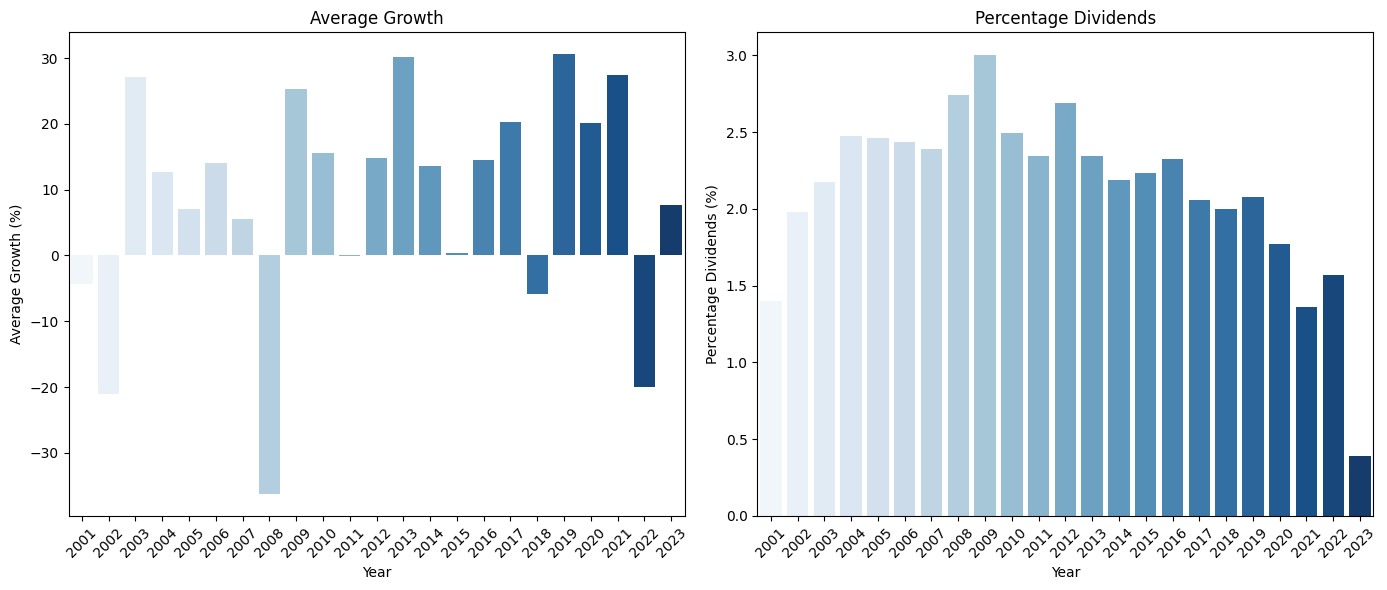

In [88]:
import seaborn as sns

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the average_growth bar chart
sns.barplot(data=df_new, x=df_new.index, y='average_growth', palette="Blues", ax=ax1)
ax1.set_title('Average Growth')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Growth (%)')

# Plot the pct_div bar chart
sns.barplot(data=df_new, x=df_new.index, y='pct_div', palette="Blues", ax=ax2)
ax2.set_title('Percentage Dividends')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage Dividends (%)')

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


C:\Users\cni4\AppData\Local\Temp\ipykernel_38836\2504269674.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


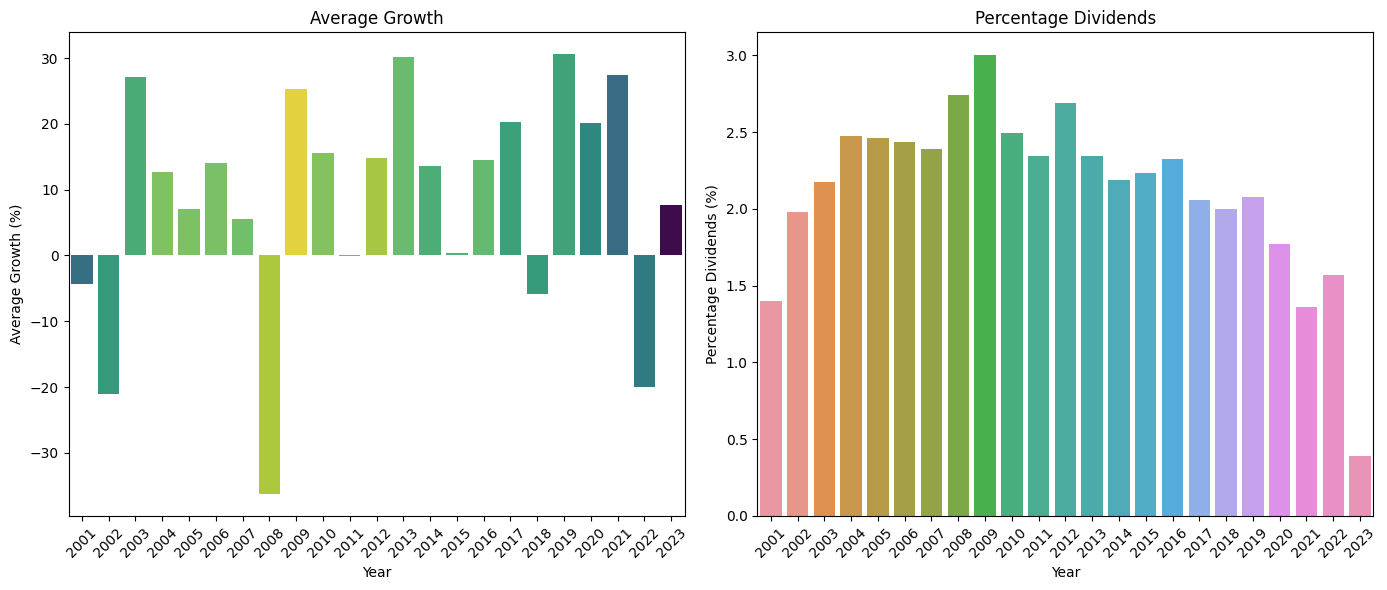

In [91]:
from matplotlib import cm
from sklearn.preprocessing import MinMaxScaler

# Normalize 'pct_div' values to the range [0, 1]
scaler = MinMaxScaler()
df_new['pct_div_normalized'] = scaler.fit_transform(df_new[['pct_div']])

# Create a colormap
cmap = cm.get_cmap('viridis')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the average_growth bar chart with colors based on 'pct_div'
sns.barplot(data=df_new, x=df_new.index, y='average_growth', 
            palette=cmap(df_new['pct_div_normalized']), ax=ax1)
ax1.set_title('Average Growth')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Growth (%)')

# Plot the pct_div bar chart
sns.barplot(data=df_new, x=df_new.index, y='pct_div', ax=ax2)
ax2.set_title('Percentage Dividends')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage Dividends (%)')

ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## In the prompt write a json: sentiment, key word: war, conflict pandemic, ... if yes: country

import yfinance as yf

msft = yf.Ticker("MSFT")

# get all stock info
msft.info

# get historical market data
hist = msft.history(period="1mo")

# show meta information about the history (requires history() to be called first)
msft.history_metadata

# show actions (dividends, splits, capital gains)
msft.actions
msft.dividends
msft.splits
msft.capital_gains  # only for mutual funds & etfs

# show share count
# - yearly summary:
msft.shares
# - accurate time-series count:
msft.get_shares_full(start="2022-01-01", end=None)

# show financials:
# - income statement
msft.income_stmt
msft.quarterly_income_stmt
# - balance sheet
msft.balance_sheet
msft.quarterly_balance_sheet
# - cash flow statement
msft.cashflow
msft.quarterly_cashflow
# see `Ticker.get_income_stmt()` for more options

# show holders
msft.major_holders
msft.institutional_holders
msft.mutualfund_holders

# show earnings
msft.earnings
msft.quarterly_earnings

# show sustainability
msft.sustainability

# show analysts recommendations
msft.recommendations
msft.recommendations_summary
# show analysts other work
msft.analyst_price_target
msft.revenue_forecasts
msft.earnings_forecasts
msft.earnings_trend

# show next event (earnings, etc)
msft.calendar

# Show future and historic earnings dates, returns at most next 4 quarters and last 8 quarters by default. 
# Note: If more are needed use msft.get_earnings_dates(limit=XX) with increased limit argument.
msft.earnings_dates

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin

# show options expirations
msft.options

# show news
msft.news

# get option chain for specific expiration
opt = msft.option_chain('YYYY-MM-DD')
# data available via: opt.calls, opt.puts

In [90]:
pip install scikit-learn

     ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
      --------------------------------------- 0.1/8.4 MB 4.3 MB/s eta 0:00:02
     -- ------------------------------------- 0.5/8.4 MB 5.6 MB/s eta 0:00:02
     ---- ----------------------------------- 0.9/8.4 MB 7.0 MB/s eta 0:00:02
     ----- ---------------------------------- 1.2/8.4 MB 6.7 MB/s eta 0:00:02
     -------- ------------------------------- 1.7/8.4 MB 7.7 MB/s eta 0:00:01
     --------- ------------------------------ 2.1/8.4 MB 7.7 MB/s eta 0:00:01
     ---------- ----------------------------- 2.2/8.4 MB 7.5 MB/s eta 0:00:01
     ------------ --------------------------- 2.6/8.4 MB 7.3 MB/s eta 0:00:01
     ------------- -------------------------- 2.9/8.4 MB 7.2 MB/s eta 0:00:01
     -------------- ------------------------- 3.1/8.4 MB 6.9 MB/s eta 0:00:01
     ---------------- ----------------------- 3.4/8.4 MB 6.8 MB/s eta 0:00:01
     ---------------- ----------------------- 3.4/8.4 MB 6.4 MB/s eta 0